# Homework 1-4: Linear regression with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('yelp.json', 'r') as f:
    data = [json.loads(row) for row in f]

In [3]:
# show the first review
print(data[0])

{'votes': {'funny': 0, 'useful': 5, 'cool': 2}, 'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q', 'review_id': 'fWKvX83p0-ka4JS3dc6E5A', 'stars': 5, 'date': '2011-01-26', 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the

In [4]:
# convert the list of dictionaries to a DataFrame
data = pd.DataFrame(data)

In [5]:
# add DataFrame columns for cool, useful, and funny
data["cool"] = 0
data["useful"] = 0
data["funny"] = 0

In [6]:
# drop the votes column and then display the head
data = data.drop(columns=['votes'])
print(data.head())

                  user_id               review_id  stars        date  \
0  rLtl8ZkDX5vH5nAx9C3q5Q  fWKvX83p0-ka4JS3dc6E5A      5  2011-01-26   
1  0a2KyEL0d3Yb1V6aivbIuQ  IjZ33sJrzXqU-0X6U8NwyA      5  2011-07-27   
2  0hT2KtfLiobPvh6cDC8JQg  IESLBzqUCLdSzSqm0eCSxQ      4  2012-06-14   
3  uZetl9T0NcROGOyFfughhg  G-WvGaISbqqaMHlNnByodA      5  2010-05-27   
4  vYmM4KTsC8ZfQBg-j5MWkw  1uJFq2r5QfJG_6ExMRCaGw      5  2012-01-05   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

              business_id  cool  useful  funny  
0  9yKzy9PApeiPPOUJEtnvkg     0       0      0  
1  ZRJwVLyzEJq1VAihDhYiow     0       0      0  
2  6oRAC4uyJCsJl1X0WZpVSA     0    

## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [7]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
yelp.groupby(['stars']).mean(numeric_only=True)

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


<Axes: >

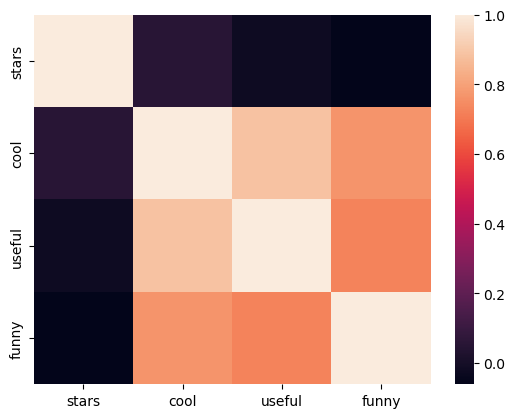

In [8]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr(numeric_only=True))

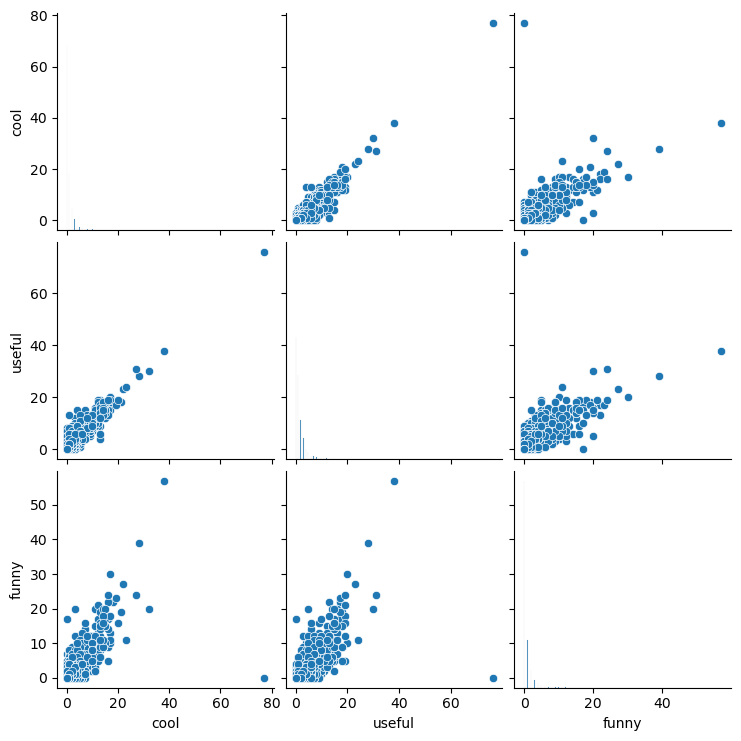

In [9]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.pairplot(yelp[["cool", "useful", "funny"]])

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [10]:
import numpy as np
x=yelp[["cool", "useful", "funny"]]
y=yelp[["stars"]]

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x,y)
print(reg.coef_)

[[ 0.27435947 -0.14745239 -0.13567449]]


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [13]:
# define a function that accepts a list of features and returns testing RMSE
from math import sqrt
def get_RMSE(y_test,y_predict):
    mse = np.sum((y_test - y_predict) ** 2) / len(y_test)   
    rmse = sqrt(mse)
    return rmse

In [14]:
# calculate RMSE with all three features
def run_model(x,y):
    # 默认分割比例3:1
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
    reg = LinearRegression().fit(x_train,y_train)
    y_predict = reg.predict(x_test)
    print("Using features:", x_test.columns.values)
    print("RMSE:", get_RMSE(y_test,y_predict))
run_model(x,y)

Using features: ['cool' 'useful' 'funny']
RMSE: 1.180192896464537


## Task 6

Try removing some of the features and see if the RMSE improves.

In [15]:
run_model(x.drop(columns=['cool']),y)
run_model(x.drop(columns=['useful']),y)
run_model(x.drop(columns=['funny']),y)
run_model(x.drop(columns=['cool','useful']),y)
run_model(x.drop(columns=['cool','funny']),y)
run_model(x.drop(columns=['useful','funny']),y)

Using features: ['useful' 'funny']
RMSE: 1.2097781150483538
Using features: ['cool' 'funny']
RMSE: 1.1905471361967306
Using features: ['cool' 'useful']
RMSE: 1.1962708539596836
Using features: ['funny']
RMSE: 1.210788385462426
Using features: ['useful']
RMSE: 1.213360667126727
Using features: ['cool']
RMSE: 1.2110237250708398


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [16]:
# new feature: 
def get_dict(data):
    change = data.drop_duplicates().to_list()
    change_dict = {}
    for i in range(len(change)):
        change_dict[change[i]] = i
    return change, change_dict

_, business_id_dict = get_dict(yelp['business_id'])
yelp['business_id'] = yelp['business_id'].map(business_id_dict)
# 选择business_id作为new feature的理由之一：用户对商家的stars评价  自然考虑与商家自身有关的概率会高

In [17]:
# new features: 
x_new = yelp[["business_id","cool", "useful", "funny"]]

In [18]:
# add new features to the model and calculate RMSE
run_model(x_new,y)
# 结果展示了选择business_id加入new features的效果

Using features: ['business_id' 'cool' 'useful' 'funny']
RMSE: 1.1764724289545105


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [19]:
# null model
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
y_predict = y_train.mean()
print("RMSE:", get_RMSE(y_test,y_predict))
# 均方根误差RMSE越小越好
# 线性回归需要选取合适的特征，其预测效果通常要比null model好

RMSE: 1.2134877337657763
